# FUNDAMENTALS_18 딥러닝 들여다보기

  - 그동안은 딥러닝을 이용한 프로젝트에 여러 딥러닝 프레임워크를 사용했다면 이번엔 오직 Numpy만을 이용해서 간단한 신경망과 그 훈련과정을 구현해본다.

### Step 1. 신경망 구성
  - 머신러닝/딥러닝 과학자들은 우리 뇌 속의 신경망 구조에 착안해서 퍼셉트론(Perceptron)이라는 형태를 제안했다.
  - 이를 연결한 형태를 인공신경망(Arificial Neural Network)라고 부른다.

In [1]:
# 우리는 MNIST 데이터셋을 분류할 때 Tensorflow를 사용해서 모델을 구성해서 진행하였다.

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5092 - accuracy: 0.8766
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2343 - accuracy: 0.9348
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1818 - accuracy: 0.9487
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1502 - accuracy: 0.9574
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1289 - accuracy: 0.9637
Epoc

  - 뇌 속의 뉴런은 약 1000억개라고 하는데 여기서는 39,760개의 파라미터를 가지고 0.97%의 성능을 보여주고 있다.

### 다층 퍼셉트론(Multi-Layer Perceptron)

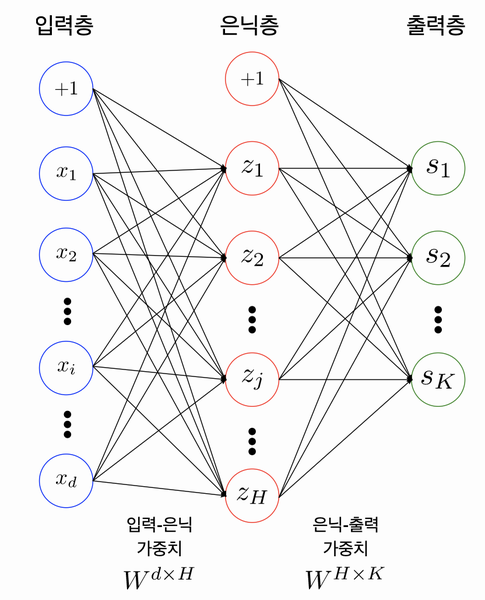

  - 위의 이미지는 총 3개의 레이어로 구성된 퍼셉트론을 나타낸다.
  - 은닉층에는 H개의 노드가, 출력층에는 K개의 노드가 존재하는 인공신경망을 표현한 그림이다.
  - 위의 이미지에서는 입력층과 출력층 사이에 은닉층이 있어서 총 3개의 레이어가 있다고 생각할 수 있지만 사실은 총 2개의 레이어를 가진것으로 생각해야 한다.

### Parameters/Weights

  - 입력층-은닉층, 은닉층-출력층 사이에는 각각 행렬이 존재한다.
  - 예를 들어 입력값이 100이고 은닉노드가 20개라면 입력층-은닉층 사이에는 100x20의 형태를 가진 행렬이 존재하는 것이다.
  - 이러한 행렬들을 Parameter 혹은 Weight라고 부른다.

In [3]:
# 우리가 위에서 Tensorflow를 사용해서 만든 모델을 Numpy를 통해서 다시 만들어보자

# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [6]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
a1[0]

array([ 1.85873532e-01,  1.51367683e+00,  1.07961919e+00,  1.44037459e-01,
        1.00640642e+00,  3.06317825e-01, -7.43939898e-01,  7.44025215e-01,
        6.31701995e-01,  1.23890155e-01, -5.31537134e-01,  2.51729458e-01,
       -1.26354164e-03,  5.24203397e-01,  4.38525440e-01, -3.15093861e-01,
       -3.47202280e-01,  7.10757968e-02, -1.11254901e+00, -2.30094242e-01,
       -2.29121103e-01, -6.37050190e-01,  8.80774547e-01,  7.59832584e-01,
        1.30588094e-01,  7.11056233e-01, -3.58306222e-01, -5.96705558e-01,
       -1.32540132e+00,  6.33064233e-01, -1.26506900e+00, -5.63035141e-01,
       -1.57220040e-01,  1.65443990e+00, -1.14899863e+00, -6.15950197e-01,
       -3.78783685e-01, -4.18950841e-01, -6.15908783e-01, -1.17948880e+00,
        8.68143716e-01,  7.87378183e-01,  6.93446052e-01, -7.56959907e-01,
        1.71196700e-01, -7.07550939e-01,  1.70408475e+00,  1.00697602e-01,
        3.17345995e-01,  1.06606834e+00])

### 활성화 함수
  - 활성화함수는 MLP에서는 매우 중요한 구성요서이다. 특히 딥러닝에서는 활성화 함수의 존재가 필수적이다.
  - 그 이유는 활성화함수는 보통 비선형 함수를 사용하는데 비선형 함수를 MLP에 포함시키면 모델의 표현력이 좋아지게 된다.

In [7]:
# Sigmoid
# 우리는 전에 model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,))) sigmoid 함수를 사용한 적이 있다.
# 이번에는 첫번째 은닉층인 a1에다가 sigmoid를 적용해보자

# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.54633506 0.81960547 0.74642191 0.53594724 0.73231629 0.57598623
 0.3221432  0.67787543 0.65287528 0.53093298 0.37015845 0.56260213
 0.49968411 0.62813013 0.60790762 0.42187187 0.41406102 0.51776147
 0.24739598 0.44272889 0.442969   0.34591365 0.7069827  0.68131738
 0.53260071 0.67063451 0.41136964 0.35509777 0.20992106 0.65318394
 0.22010253 0.36284548 0.46077575 0.83949021 0.24067204 0.35070308
 0.40642029 0.39676783 0.35071251 0.23514412 0.7043593  0.6872681
 0.66673308 0.31930667 0.54269495 0.33014022 0.84606747 0.52515315
 0.57867731 0.7438485 ]


  - Tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결한다.
  - 하지만 vanishing gradient의 문제가 여전히 존재한다.
  
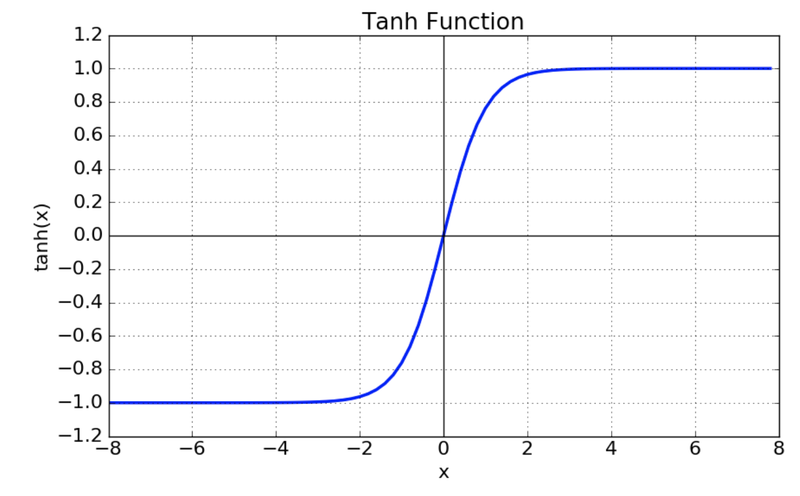

  - ReLU 함수는 sigmoid, tanh 함수에 비해서 학습이 빠르다.
  - 연산 비용이 크지 않고 구현이 매우 간단하다.
  
  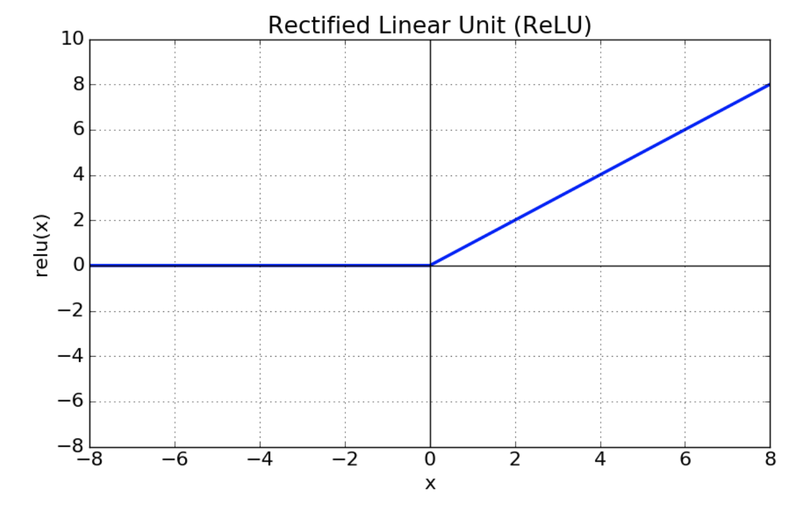

  - sigmoid 다음에는 다시 Dense 레이어가 나온다. 출력 노드 개수만 다를 뿐 동일한 구조이다.
  - MLP 레이어를 아래와 같이 함수로 구현할 수 있다.

In [9]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [10]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.16368531 -0.2620959   1.20429635 -0.11740759 -0.49022983 -0.22056612
  0.53917054  0.35383287  0.39240905  0.06438914]


In [11]:
# a2함수에 softmax 함수를 적용시키면 모델의 출력은 x가 10가지 숫자 중 하나일 확률의 형태로 가공된다.

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [12]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.06559711, 0.05944913, 0.25762713, 0.06870413, 0.04732256,
       0.06197003, 0.13247414, 0.11006266, 0.11439141, 0.0824017 ])

### 손실함수(Loss Functions)

  - 비선형 활성화 함수를 가진 여러개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달된다.
  - 이 때 우리가 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고 이 차이를 줄이기 위해 각 파라미터들을 조정해준다.
  - 이 차이를 구하는데 사용되는 함수가 손실함수 또는 비용함수라고 한다.
  - 대표적인 손실함수로는 평균제곱오차(Mean Squeare Error) / 교차 엔트로피(Cross Entropy)가 있다.

In [13]:
# 교차 엔트로피는 두 확률분포 사이의 유사도가 클수록 작아지는 값이다.
# 아직 별로 확습되지 않은 현재 모델이 출력하는 softmax 값 y는 10개 숫자 각각의 확률이 대부분 0.1 근처를 보여준다.
# 모델을 학습하고나면 y값은 정답에 가까워지게 된다.

# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
print(y_hat[0])
print(t[0])

[0.06559711 0.05944913 0.25762713 0.06870413 0.04732256 0.06197003
 0.13247414 0.11006266 0.11439141 0.0824017 ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.8048084699590063

### 경사하강법
  - 위에서 구한 오차를 가지고 오차를 줄이는 것이 중요하다.
  - 오차를 줄이는 것은 경사하강법을 사용해서 줄일 수 있다.
  - 경사하강법은 각 단계에서의 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동하는 방법이다.
  - 경사하강법을 사용함에 있어서 학습률(Learning rate)와 parameter의 값을 설정해주는 것이 매우 중요하다.

### 오차역전파법
  - 경사하강법을 통해서 얻은 기울기를 가지고 입력층까지 전달하며 파라미터들을 조정해 나가기 위해서 사용하는 개념이 오차역전파법이다.
  - 오차역전파법은 MLP를 학습시키기 위한 일반적인 알고리즘 중 하나이다.
  - 이는 출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한 뒤 그 오차 값을 각 레이어들을 지나며 역전파 해서 변수들을 갱신하는 방식이다.